In [66]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense,Reshape
from keras.datasets import mnist

In [67]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=train_images/255
test_images=test_images/255

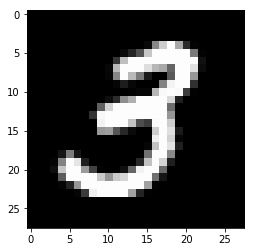

In [73]:
plt.imshow(train_images[np.random.randint(len(train_images))],cmap="gray")

In [84]:
inp = Input(shape=(28,28))
net = Flatten()                           (inp)
net = Dense(2048,activation='relu')       (net)
net = Dense(1024,activation='relu')       (net)
net = Dense(512,activation='relu')        (net)
net = Dense(64,activation='relu')         (net)
net = Dense(128,activation='relu')        (net)
net = Dense(512,activation='relu')        (net)
net = Dense(784,activation='sigmoid')     (net)
net = Reshape((28,28))                    (net)


In [85]:
model=Model(inp,net)

In [87]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [95]:
model.fit(train_images,train_images,epochs=2)

Epoch 1/2
34528/60000 [================>.............] - ETA: 2:03 - loss: 0.1181

KeyboardInterrupt: 

In [96]:
inp_gen = Input(shape=[64])
gen = model.layers[6](inp_gen)
for layer in model.layers[7:]:
    gen=layer(gen)

In [97]:
gen_model=Model(inp_gen,gen)

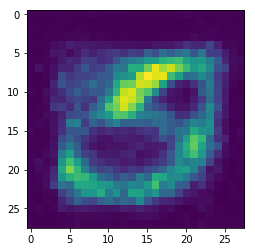

In [100]:
kepek = gen_model.predict(np.random.randn(2,64)*2)
plt.imshow(kepek[0])